# Principal Component Analysis (PCA)

The **goal** of PCA is identify patterns and detect the correlation between independent variables.

## Step-by-step

+ **Step 1.** Standardize the data. PCA is sensitive to scale, so the normalization of the data is needed.
+ **Step 2.** Compute covariance matrix. The covariance matrix shows how features vary with respect to each other. A high covariance between two features means they contain redundant information.
+ **Step 3.** Compute Eigenvalues and Eigenvectors
  + **Eigenvalues** indicate the variance explained by each principal component.
  + **Eigenvectors** indicate the directions of the new feature axes.
+ **Step 4.** Sort Eigenvalues (desc order) & Select Principal Components
+ **Step 5.** Compute Explained Variance Ratio. The explained variance ratio tells us how much information each principal component retains. If the first few components explain most of the variance, we can reduce dimensionality.
+ **Step 6.** Project Data onto Principal Components

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.precision", 4)  # Set precision to 4 decimal places


## Dataset

In [2]:
%cat '../00_data/Wine.csv'|head

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290,1
14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045,1


In [3]:
data = pd.read_csv('../00_data/Wine.csv')

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

## Manual PCA

In [8]:
# Step 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data.columns[:-1])
X_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.5186,-0.5622,0.2321,-1.1696,1.9139,0.8090,1.0348,-0.6596,1.2249,0.2517,0.3622,1.8479,1.0130
1,0.2463,-0.4994,-0.8280,-2.4908,0.0181,0.5686,0.7336,-0.8207,-0.5447,-0.2933,0.4061,1.1134,0.9652
2,0.1969,0.0212,1.1093,-0.2687,0.0884,0.8090,1.2155,-0.4984,2.1360,0.2690,0.3183,0.7886,1.3951
3,1.6915,-0.3468,0.4879,-0.8093,0.9309,2.4914,1.4665,-0.9819,1.0322,1.1861,-0.4275,1.1841,2.3346
4,0.2957,0.2277,1.8404,0.4519,1.2820,0.8090,0.6634,0.2268,0.4014,-0.3193,0.3622,0.4496,-0.0379


In [9]:
# Step 2. Covariance Matrix
cov_matrix = np.cov(X_scaled.round(2).T)

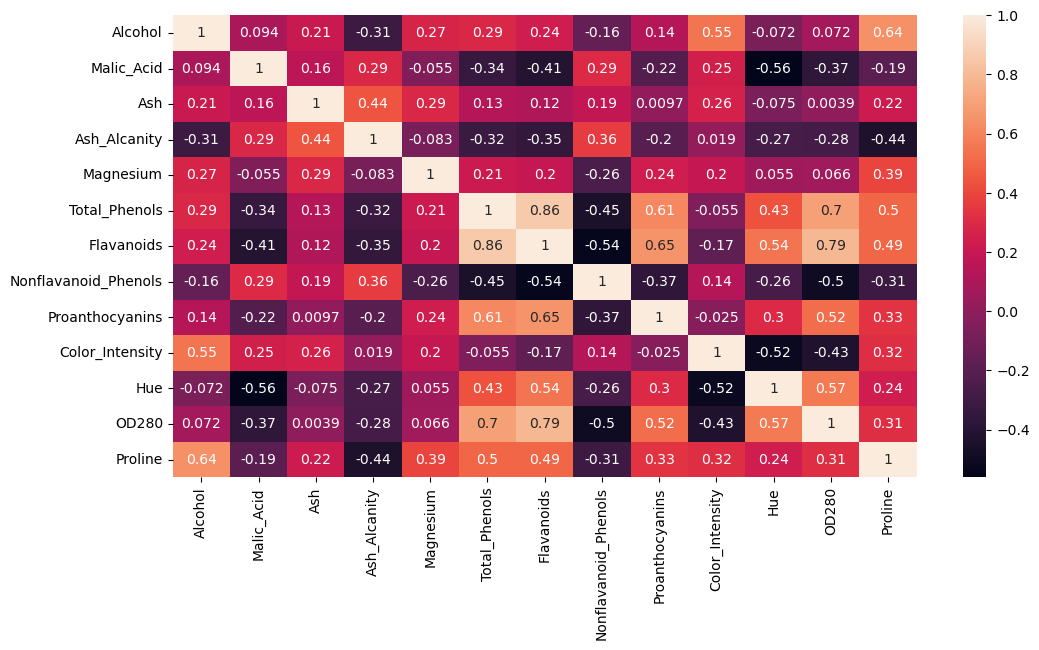

In [10]:
# plot covariance matrix using correlation coeficients
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(X_scaled.corr(), annot=True)

plt.show()

In [11]:
# Step 3. Eigenvalues and Eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues.round(2))
print("Eigenvectors:\n", eigenvectors.round(2))

Eigenvalues:
 [4.73 2.51 1.45 0.92 0.86 0.65 0.55 0.1  0.35 0.17 0.29 0.23 0.25]
Eigenvectors:
 [[-0.14  0.48 -0.21  0.02 -0.27  0.21  0.05 -0.01  0.4  -0.27 -0.51 -0.23
   0.21]
 [ 0.25  0.23  0.09 -0.54  0.03  0.54 -0.42 -0.03  0.06  0.12  0.07  0.08
  -0.31]
 [ 0.    0.32  0.63  0.21 -0.14  0.15  0.15  0.14 -0.17 -0.05  0.31 -0.5
  -0.03]
 [ 0.24 -0.01  0.61 -0.06  0.07 -0.1   0.29 -0.09  0.43 -0.05 -0.2   0.48
   0.06]
 [-0.14  0.3   0.13  0.35  0.73  0.04 -0.32 -0.06 -0.16  0.06 -0.27  0.07
   0.07]
 [-0.39  0.06  0.15 -0.2  -0.15 -0.08  0.03  0.46 -0.4  -0.3  -0.29  0.31
  -0.32]
 [-0.42 -0.    0.15 -0.15 -0.11 -0.02  0.06 -0.83 -0.19 -0.04 -0.05 -0.03
  -0.16]
 [ 0.3   0.03  0.17  0.2  -0.5  -0.26 -0.6  -0.11 -0.23  0.04 -0.2   0.12
   0.22]
 [-0.31  0.04  0.15 -0.4   0.14 -0.53 -0.37  0.12  0.37 -0.1   0.21 -0.24
   0.13]
 [ 0.09  0.53 -0.14 -0.07 -0.08 -0.42  0.23  0.01 -0.03  0.6  -0.06  0.03
  -0.29]
 [-0.3  -0.28  0.09  0.43 -0.17  0.11 -0.23  0.09  0.44  0.26 -0.09 -0.05
 

In [12]:
# Step 4. 
sorted_idx = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Sorted Eigenvalues:\n", eigenvalues.round(2))
print("Sorted Eigenvectors:\n", eigenvectors.round(2))

Sorted Eigenvalues:
 [4.73 2.51 1.45 0.92 0.86 0.65 0.55 0.35 0.29 0.25 0.23 0.17 0.1 ]
Sorted Eigenvectors:
 [[-0.14  0.48 -0.21  0.02 -0.27  0.21  0.05  0.4  -0.51  0.21 -0.23 -0.27
  -0.01]
 [ 0.25  0.23  0.09 -0.54  0.03  0.54 -0.42  0.06  0.07 -0.31  0.08  0.12
  -0.03]
 [ 0.    0.32  0.63  0.21 -0.14  0.15  0.15 -0.17  0.31 -0.03 -0.5  -0.05
   0.14]
 [ 0.24 -0.01  0.61 -0.06  0.07 -0.1   0.29  0.43 -0.2   0.06  0.48 -0.05
  -0.09]
 [-0.14  0.3   0.13  0.35  0.73  0.04 -0.32 -0.16 -0.27  0.07  0.07  0.06
  -0.06]
 [-0.39  0.06  0.15 -0.2  -0.15 -0.08  0.03 -0.4  -0.29 -0.32  0.31 -0.3
   0.46]
 [-0.42 -0.    0.15 -0.15 -0.11 -0.02  0.06 -0.19 -0.05 -0.16 -0.03 -0.04
  -0.83]
 [ 0.3   0.03  0.17  0.2  -0.5  -0.26 -0.6  -0.23 -0.2   0.22  0.12  0.04
  -0.11]
 [-0.31  0.04  0.15 -0.4   0.14 -0.53 -0.37  0.37  0.21  0.13 -0.24 -0.1
   0.12]
 [ 0.09  0.53 -0.14 -0.07 -0.08 -0.42  0.23 -0.03 -0.06 -0.29  0.03  0.6
   0.01]
 [-0.3  -0.28  0.09  0.43 -0.17  0.11 -0.23  0.44 -0.09 -0.52 -

In [13]:
# Step 5.
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratio:\n", explained_variance_ratio.round(2))

Explained Variance Ratio:
 [0.36 0.19 0.11 0.07 0.07 0.05 0.04 0.03 0.02 0.02 0.02 0.01 0.01]


In [14]:
PC_list = [f"PC{i}" for i in range(0, len(explained_variance_ratio))]
explained_variance_cumsum = (np.cumsum(explained_variance_ratio)).round(2)
print("CumSum explained variance")
print(pd.DataFrame(np.array([f"{(pc*100).round(0)}%" for pc in explained_variance_cumsum]).reshape(1, -1), columns=PC_list))

CumSum explained variance
     PC0    PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
0  36.0%  55.0%  67.0%  74.0%  80.0%  85.0%  89.0%  92.0%  94.0%  96.0%   

    PC10   PC11    PC12  
0  98.0%  99.0%  100.0%  


In [15]:
# Step 6.
X_pca_manual = X.dot(eigenvectors)
df_pca_manual = pd.DataFrame(X_pca_manual, columns=PC_list)
df_pca_manual.iloc[:5, :3] # 3 components

,PC0,PC1,PC2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


## `sklearn` PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pac = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3'])
X_pac.head()

,PC1,PC2,PC3
0,318.5630,21.4921,-3.1307
1,303.0974,-5.3647,-6.8228
2,438.0611,-6.5373,1.1132
3,733.2401,0.1927,0.9173
4,-11.5714,18.4900,0.5544


## Splitting the data into training and test set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Applying PCA

In [19]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

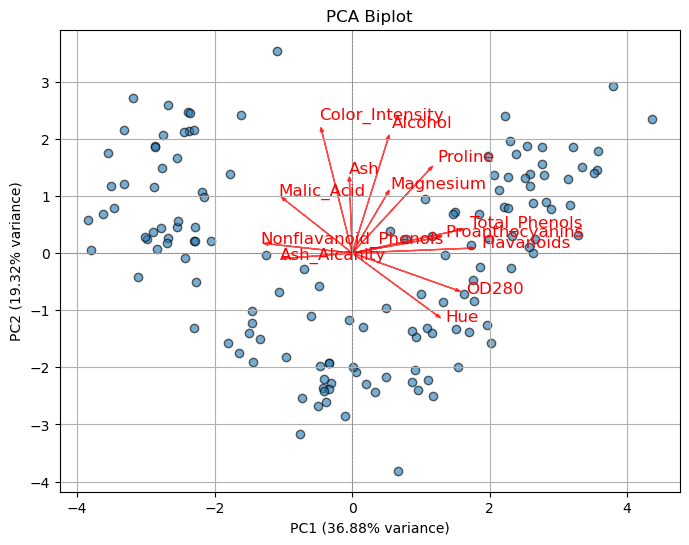

In [20]:
plt.figure(figsize=(8, 6))

df_pca = pd.DataFrame(X_train, columns=['PC1', 'PC2'])

# Scatter plot of PCA-transformed data
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6, edgecolors='k')

# Plot arrows (loadings) for original features
loadings = pca.components_.T  # Transpose to match PC1 and PC2
scaling_factor = 4  # Scale arrows for better visibility

for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0] * scaling_factor, loadings[i, 1] * scaling_factor,
              color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * scaling_factor * 1.1, loadings[i, 1] * scaling_factor * 1.1,
             feature, color='r', fontsize=12)

# Labels and title
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Biplot')

# Grid and equal aspect ratio
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


The angle between the vectors (original variables) determines the correlation between the variables, while the direction of the vectors indicates the direction of the correlation. If the vectors of the original variables are aligned with the axis of a principal component, it means that these variables are the main contributors to forming that principal component.

## Training the Logistic Regression model on the training set

In [21]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
# Evaluation
y_pred = classifier.predict(X_test) # the testing set has already been scaled
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

## Model Performance

### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


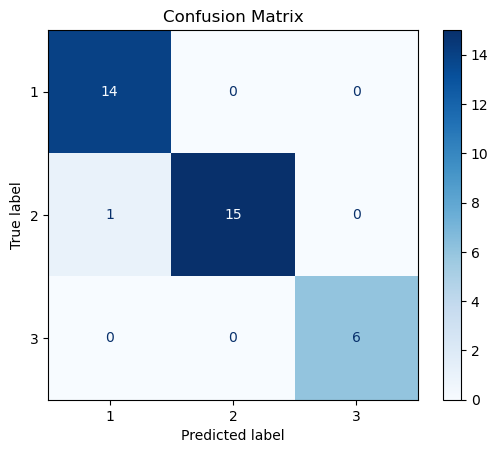

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues,
         colorbar=True)
plt.title("Confusion Matrix")
plt.show()

### Accuracy

In [25]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test, y_pred)
print(ac)

0.9722222222222222


## Viz the results

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_80771/2051485351.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


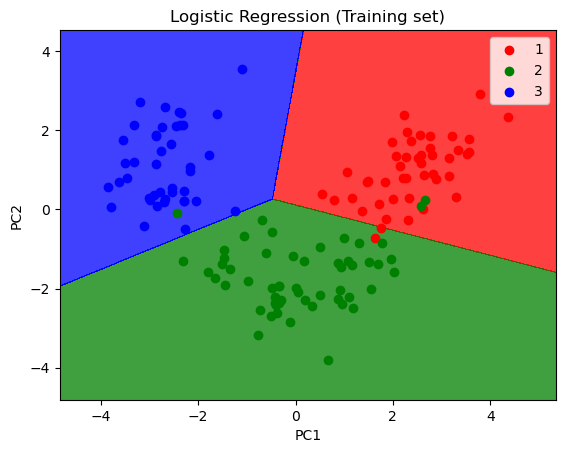

In [26]:
# Viz on train set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_80771/1100510819.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


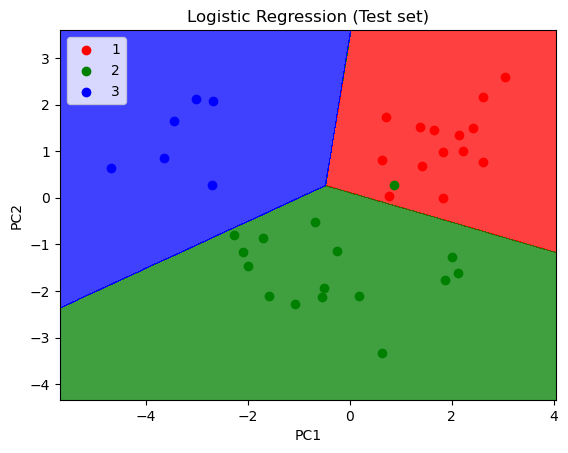

In [27]:
# Viz on test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()